## importing lib

In [2]:
import pandas as pd
import numpy as np

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns


## Exploring the data

In [4]:
df = pd.read_csv(r"C:\Projects\clustering\Customer-Segmentation\Data\customer_segmentation.csv")

In [5]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [6]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [8]:
df.shape

(2240, 29)

In [9]:
df.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [10]:
df.dropna(inplace=True)

In [11]:
df.isna().sum() 

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

In [12]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,...,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.0,2216.0,2216.000000
mean,5588.353339,1968.820397,52247.251354,0.441787,0.505415,49.012635,305.091606,26.356047,166.995939,37.637635,...,5.319043,0.073556,0.074007,0.073105,0.064079,0.013538,0.009477,3.0,11.0,0.150271
std,3249.376275,11.985554,25173.076661,0.536896,0.544181,28.948352,337.327920,39.793917,224.283273,54.752082,...,2.425359,0.261106,0.261842,0.260367,0.244950,0.115588,0.096907,0.0,0.0,0.357417
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2814.750000,1959.000000,35303.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,174.500000,8.000000,68.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8421.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.250000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


##### exploring the categorical features

In [13]:
df["Education"].value_counts()

Education
Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: count, dtype: int64

In [14]:
df["Marital_Status"].value_counts()

Marital_Status
Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64

In [15]:
df["Dt_Customer"] = pd.to_datetime(df["Dt_Customer"] , dayfirst=True)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2216 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2216 non-null   int64         
 1   Year_Birth           2216 non-null   int64         
 2   Education            2216 non-null   object        
 3   Marital_Status       2216 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2216 non-null   int64         
 6   Teenhome             2216 non-null   int64         
 7   Dt_Customer          2216 non-null   datetime64[ns]
 8   Recency              2216 non-null   int64         
 9   MntWines             2216 non-null   int64         
 10  MntFruits            2216 non-null   int64         
 11  MntMeatProducts      2216 non-null   int64         
 12  MntFishProducts      2216 non-null   int64         
 13  MntSweetProducts     2216 non-null   i

### do some feature engeneering

In [17]:
df["Age"] = 2025 - df["Year_Birth"]

In [18]:
df["Age"]

0       68
1       71
2       60
3       41
4       44
        ..
2235    58
2236    79
2237    44
2238    69
2239    71
Name: Age, Length: 2216, dtype: int64

In [19]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,0,0,0,0,0,0,3,11,1,68
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,0,0,0,0,0,0,3,11,0,71
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,0,0,0,0,3,11,0,60
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,0,0,0,0,0,3,11,0,41
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,0,0,0,0,3,11,0,44


In [20]:
df["Total_children"] = df["Kidhome"] + df["Teenhome"]

In [21]:
df["Total_children"]

0       0
1       2
2       0
3       1
4       1
       ..
2235    1
2236    3
2237    0
2238    1
2239    2
Name: Total_children, Length: 2216, dtype: int64

In [22]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Total_children
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,0,0,0,0,0,3,11,1,68,0
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,0,0,0,0,0,3,11,0,71,2
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,0,0,0,3,11,0,60,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,0,0,0,0,3,11,0,41,1
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,0,0,0,3,11,0,44,1


In [23]:
spending_cols = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

In [24]:
df['Total_Spending'] = df[spending_cols].sum(axis=1)

In [25]:
df['costumer_since'] = (pd.Timestamp("today") - df["Dt_Customer"]).dt.days

In [26]:

df['costumer_since']

0       4828
1       4278
2       4477
3       4304
4       4326
        ... 
2235    4546
2236    4184
2237    4320
2238    4321
2239    4787
Name: costumer_since, Length: 2216, dtype: int64

In [27]:
df.to_csv("../Data/cleaned_data.csv", index=False)


### exploratory data analysis

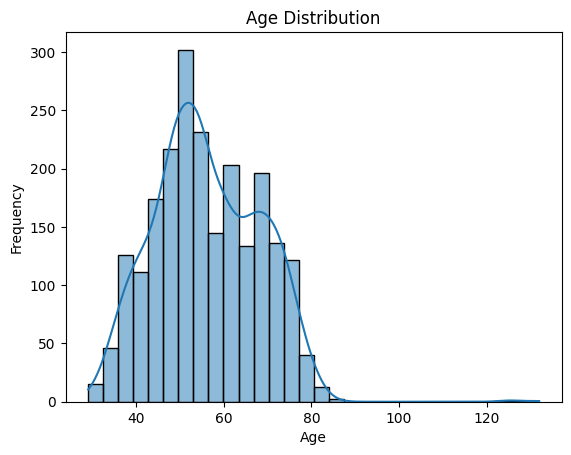

In [28]:
sns.histplot(df['Age'], bins=30, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')   
plt.ylabel('Frequency')
plt.show()

the mean is 50 & the max is like 80

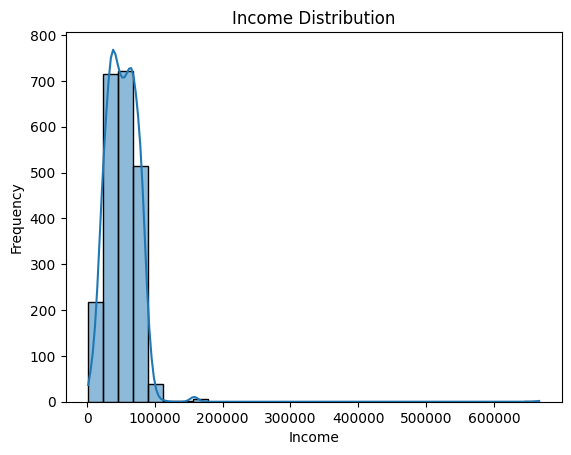

In [29]:
sns.histplot(df['Income'], bins=30, kde=True)
plt.title('Income Distribution')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.show()

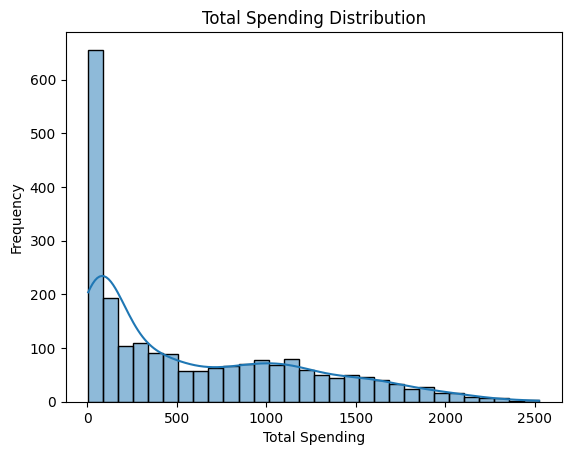

In [30]:
sns.histplot(df['Total_Spending'], bins=30, kde=True)
plt.title('Total Spending Distribution')    
plt.xlabel('Total Spending')
plt.ylabel('Frequency') 
plt.show()

### some categorical analysis

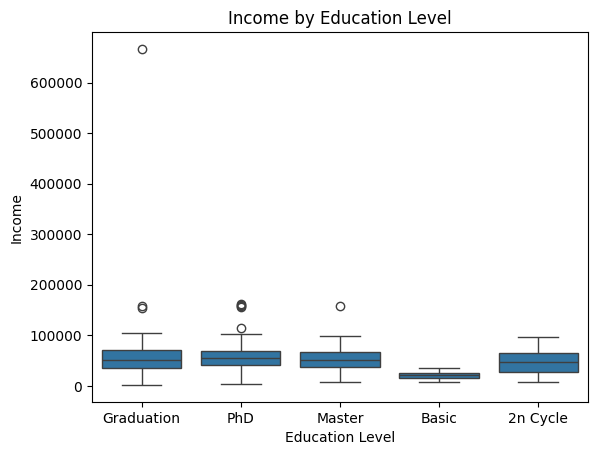

In [31]:
sns.boxplot(x = 'Education', y = 'Income', data = df)
plt.xlabel('Education Level')
plt.ylabel('Income')
plt.title('Income by Education Level')
plt.show()

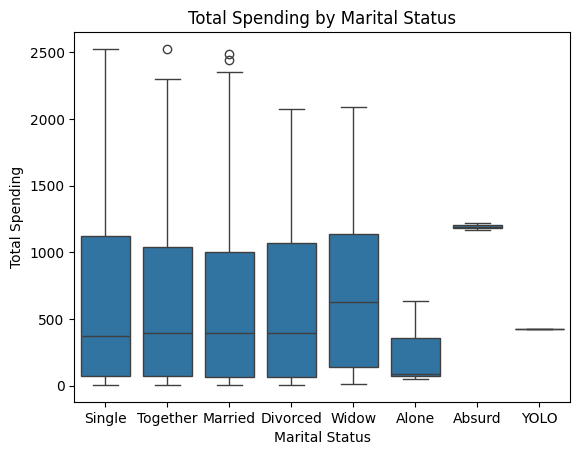

In [32]:
sns.boxplot(x='Marital_Status', y='Total_Spending', data=df)
plt.xlabel('Marital Status')
plt.ylabel('Total Spending')
plt.title('Total Spending by Marital Status')
plt.show()

In [33]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'Total_children', 'Total_Spending', 'costumer_since'],
      dtype='object')

In [36]:
corr = df[['Income', 'Age', 'Recency', 'Total_Spending' , 'NumWebPurchases', 'NumStorePurchases']].corr()

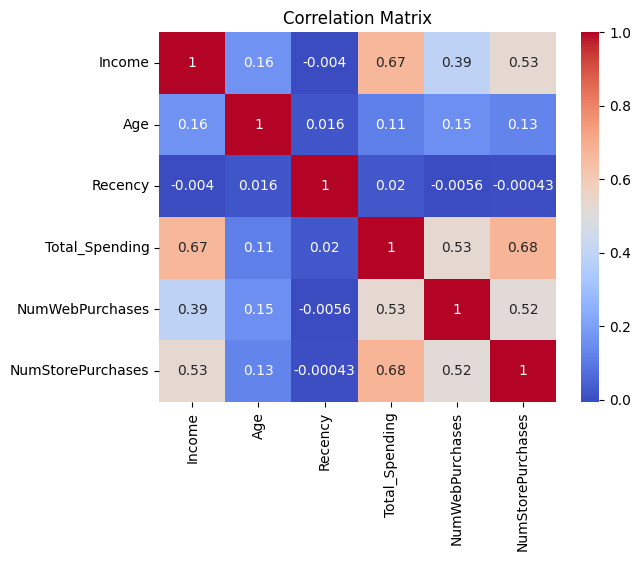

In [37]:
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [39]:
pivot_income = pd.pivot_table(df ,values='Income', index='Education', columns='Marital_Status', aggfunc='mean')

In [40]:
pivot_income

Marital_Status,Absurd,Alone,Divorced,Married,Single,Together,Widow,YOLO
Education,,,,,,,,
2n Cycle,NaN,NaN,49395.130435,46201.100000,53673.944444,44736.410714,51392.200000,NaN
Basic,NaN,NaN,9548.000000,21960.500000,18238.666667,21240.071429,22123.000000,NaN
Graduation,79244.0,34176.0,54526.042017,50800.258741,51322.182927,55758.480702,54976.657143,NaN
Master,65487.0,61331.0,50331.945946,53286.028986,53530.560000,52109.009804,58401.545455,NaN
PhD,NaN,35860.0,53096.615385,58138.031579,53314.614583,56041.422414,60288.083333,48432.0


Text(0.5, 1.0, 'Average Income by Education and Marital Status')

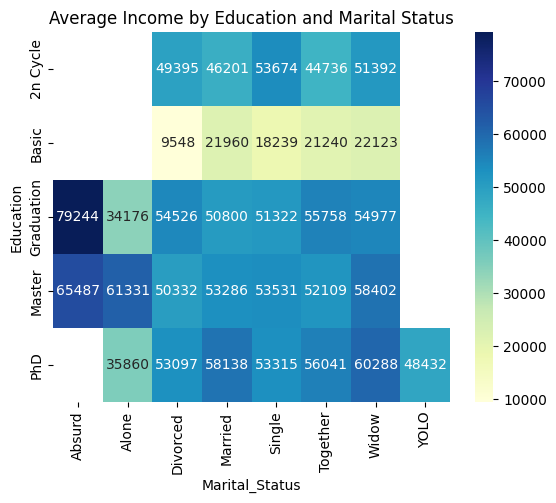

In [43]:
sns.heatmap(pivot_income, annot=True, fmt=".0f", cmap='YlGnBu')
plt.title('Average Income by Education and Marital Status')

In [44]:
group1 = df.groupby('Education')['Total_Spending'].mean().sort_values(ascending=False)

In [45]:
group1

Education
PhD           676.733888
Graduation    621.686380
Master        609.767123
2n Cycle      494.930000
Basic          81.796296
Name: Total_Spending, dtype: float64

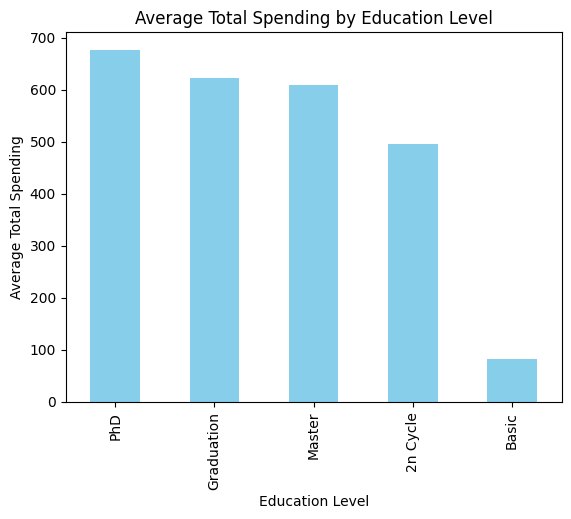

In [46]:
group1.plot(kind='bar', color='skyblue')
plt.xlabel('Education Level')   
plt.ylabel('Average Total Spending')
plt.title('Average Total Spending by Education Level')
plt.show()

In [52]:
df['acceptedany'] = df[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']].sum(axis=1)    

In [53]:

df['acceptedany'].unique()

array([1, 0, 3, 2, 4, 5])

In [55]:
df['acceptedany'] = df['acceptedany'].apply(lambda x: 1 if x > 0 else 0)    

In [56]:
df['acceptedany'].unique()

array([1, 0])

In [59]:
group2 = df.groupby('Marital_Status')['acceptedany'].mean().sort_values(ascending=False)

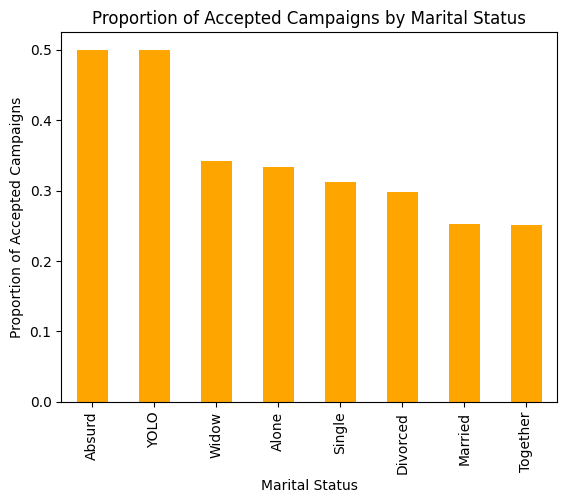

In [61]:
group2.plot(kind='bar', color='orange')
plt.xlabel('Marital Status')
plt.ylabel('Proportion of Accepted Campaigns')  
plt.title('Proportion of Accepted Campaigns by Marital Status')
plt.show()

In [62]:
bins = [18 ,30 ,40,50,60,70 ,90]

In [64]:
labels = ['18-29', '30-39', '40-49', '50-59', '60-69', '70+']

In [65]:
df['Age_Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

In [66]:
group3= df.groupby('Age_Group')['Income'].mean().sort_values(ascending=False)

C:\Users\nadam\AppData\Local\Temp\ipykernel_11488\1713693559.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group3= df.groupby('Age_Group')['Income'].mean().sort_values(ascending=False)


In [67]:
group3

Age_Group
70+      58767.083102
60-69    55980.030928
50-59    50479.321534
40-49    48057.587649
30-39    47905.475676
18-29    10960.500000
Name: Income, dtype: float64

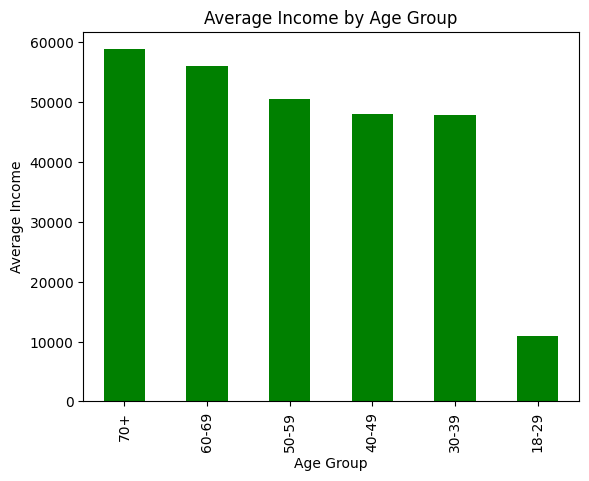

In [69]:
group3.plot(kind='bar', color='green')
plt.xlabel('Age Group')
plt.ylabel('Average Income')
plt.title('Average Income by Age Group')
plt.show()

In [70]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'Total_children', 'Total_Spending', 'costumer_since',
       'acceptedany', 'Age_Group'],
      dtype='object')

In [73]:
features = ['Age', 'Income', 'Total_Spending', 'NumStorePurchases', 'NumWebPurchases', 'NumWebVisitsMonth', 'Recency']

In [74]:
x = df[features].copy()

In [75]:
x

,Age,Income,Total_Spending,NumStorePurchases,NumWebPurchases,NumWebVisitsMonth,Recency
0,68,58138.0,1617,4,8,7,58
1,71,46344.0,27,2,1,5,38
2,60,71613.0,776,10,8,4,26
3,41,26646.0,53,4,2,6,26
4,44,58293.0,422,6,5,5,94
...,...,...,...,...,...,...,...
2235,58,61223.0,1341,4,9,5,46
2236,79,64014.0,444,5,8,7,56
2237,44,56981.0,1241,13,2,6,91
2238,69,69245.0,843,10,6,3,8


## start ml workflow

In [76]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
x_scaled

array([[ 0.98644293,  0.2340627 ,  1.67548812, ...,  1.42855332,
         0.69323197,  0.31053212],
       [ 1.23680074, -0.23455948, -0.96235832, ..., -1.12588116,
        -0.1315745 , -0.38050944],
       [ 0.31882209,  0.76947764,  0.28024985, ...,  1.42855332,
        -0.54397773, -0.79513438],
       ...,
       [-1.01641959,  0.18809052,  1.05169551, ..., -0.76096195,
         0.28082874,  1.4507507 ],
       [ 1.06989553,  0.67538765,  0.39140438, ...,  0.6987149 ,
        -0.95638097, -1.41707178],
       [ 1.23680074,  0.02470453, -0.7218    , ..., -0.39604274,
         0.69323197, -0.31140528]], shape=(2216, 7))

In [77]:
from sklearn.cluster import KMeans

In [86]:
wcss = []
for index in range(2, 10):
    kmeans = KMeans(n_clusters=index, init='k-means++', random_state=42)
    kmeans.fit(x_scaled)
    wcss.append(kmeans.inertia_)

In [87]:
wcss

[10218.620143748787,
 9303.349676497382,
 8159.355714963867,
 7578.217065195128,
 7102.818964506343,
 6820.512393778461,
 6445.565381528359,
 6224.740490354581]

Text(0.5, 1.0, 'Elbow Method for Optimal k')

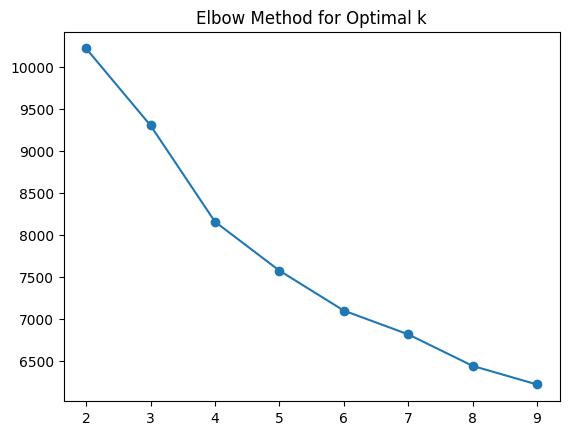

In [89]:
plt.plot(range(2, 10), wcss, marker='o')
plt.title('Elbow Method for Optimal k') 


In [90]:
kmeans = KMeans(n_clusters=6)
df['Clustered']=kmeans.fit_predict(x_scaled)


In [91]:
df['Clustered']

0       1
1       4
2       2
3       5
4       0
       ..
2235    2
2236    2
2237    1
2238    2
2239    4
Name: Clustered, Length: 2216, dtype: int32

In [92]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,Z_CostContact,Z_Revenue,Response,Age,Total_children,Total_Spending,costumer_since,acceptedany,Age_Group,Clustered
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,3,11,1,68,0,1617,4828,1,60-69,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,3,11,0,71,2,27,4278,0,70+,4
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,3,11,0,60,0,776,4477,0,60-69,2
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,3,11,0,41,1,53,4304,0,40-49,5
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,3,11,0,44,1,422,4326,0,40-49,0


In [93]:
cluster_summary = df.groupby('Clustered')[features].mean().reset_index()

In [94]:
cluster_summary

,Clustered,Age,Income,Total_Spending,NumStorePurchases,NumWebPurchases,NumWebVisitsMonth,Recency
0,0,49.140584,33396.042440,128.803714,3.265252,2.474801,7.063660,76.647215
1,1,59.140940,64323.795302,1077.932886,9.526846,7.429530,5.489933,69.734899
2,2,59.903030,58050.154545,737.157576,6.939394,6.942424,6.118182,24.918182
3,3,55.850526,79279.526316,1341.589474,8.282105,4.265263,2.183158,48.429474
4,4,69.305556,44723.725694,189.527778,4.128472,2.486111,5.107639,57.750000
5,5,49.301339,31978.462054,90.167411,3.062500,1.948661,6.609375,24.723214


In [96]:
df['Clustered'].value_counts()

Clustered
3    475
5    448
0    377
2    330
1    298
4    288
Name: count, dtype: int64

In [98]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_data = pca.fit_transform(x_scaled)
df['PCA1'] = x_pca[:, 0]
df['PCA2'] = x_pca[:, 1]


In [99]:
pca_data

array([[ 1.1075188 , -0.21175951],
       [-1.33673385,  0.269839  ],
       [ 1.88227676, -1.01416098],
       ...,
       [ 1.1535966 ,  1.15056999],
       [ 1.88768024, -1.16073698],
       [-0.84182091, -0.15963623]], shape=(2216, 2))

In [100]:
df['PCA1']

0       1.107519
1      -1.336734
2       1.882277
3      -1.784359
4       0.020363
          ...   
2235    1.248177
2236    0.508708
2237    1.153597
2238    1.887680
2239   -0.841821
Name: PCA1, Length: 2216, dtype: float64

In [101]:
df['PCA2']

0      -0.211760
1       0.269839
2      -1.014161
3      -0.704928
4       1.235265
          ...   
2235   -0.535766
2236   -0.141328
2237    1.150570
2238   -1.160737
2239   -0.159636
Name: PCA2, Length: 2216, dtype: float64

Text(0.5, 1.0, 'Customer Segments Visualization using PCA')

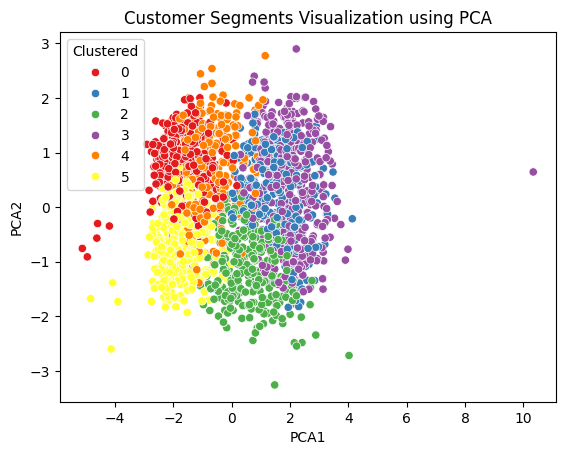

In [102]:
sns.scatterplot(data=df, x='PCA1', y='PCA2', hue='Clustered', palette='Set1')
plt.title('Customer Segments Visualization using PCA')


In [103]:
cluster_summary

,Clustered,Age,Income,Total_Spending,NumStorePurchases,NumWebPurchases,NumWebVisitsMonth,Recency
0,0,49.140584,33396.042440,128.803714,3.265252,2.474801,7.063660,76.647215
1,1,59.140940,64323.795302,1077.932886,9.526846,7.429530,5.489933,69.734899
2,2,59.903030,58050.154545,737.157576,6.939394,6.942424,6.118182,24.918182
3,3,55.850526,79279.526316,1341.589474,8.282105,4.265263,2.183158,48.429474
4,4,69.305556,44723.725694,189.527778,4.128472,2.486111,5.107639,57.750000
5,5,49.301339,31978.462054,90.167411,3.062500,1.948661,6.609375,24.723214


In [106]:
cluster_labels = {
    0: "Low-Value Inactive Customers",
    1: "Affluent Multi-Channel Spenders",
    2: "Active Mid-Value Shoppers",
    3: "Top-Tier High-Value Customers",
    4: "Senior Low-Activity Customers",
    5: "New / Recently Active Low-Spend Customers"
}


In [108]:
df['Cluster_Name'] = df['Clustered'].map(cluster_labels)


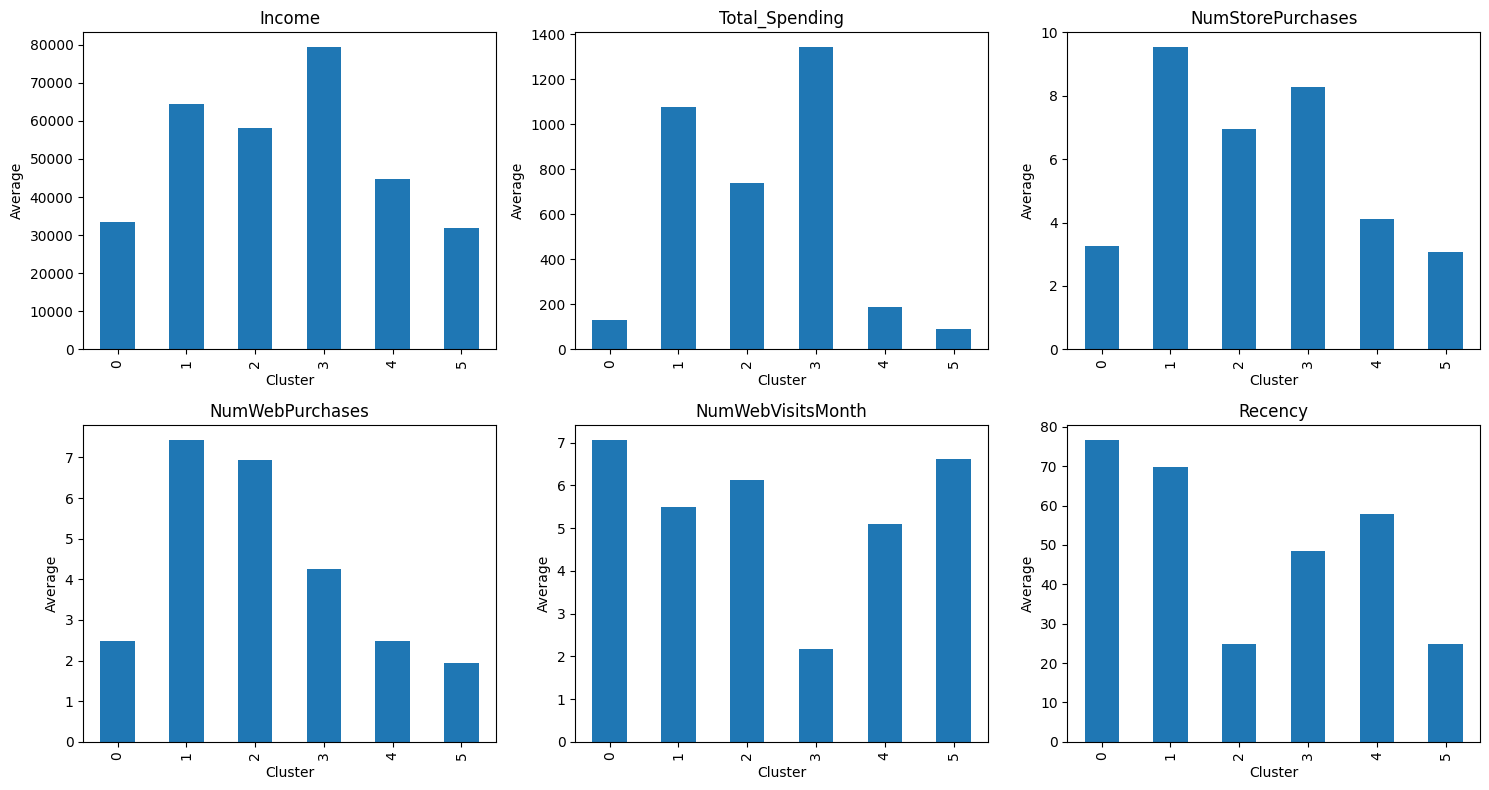

In [109]:
import matplotlib.pyplot as plt

metrics = ['Income', 'Total_Spending',
           'NumStorePurchases','NumWebPurchases',
           'NumWebVisitsMonth','Recency']

cluster_summary = df.groupby('Clustered')[metrics].mean()

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 8))
axes = axes.ravel()

for i, col in enumerate(metrics):
    cluster_summary[col].plot(kind='bar', ax=axes[i])
    axes[i].set_title(col)
    axes[i].set_xlabel("Cluster")
    axes[i].set_ylabel("Average")

plt.tight_layout()
plt.show()


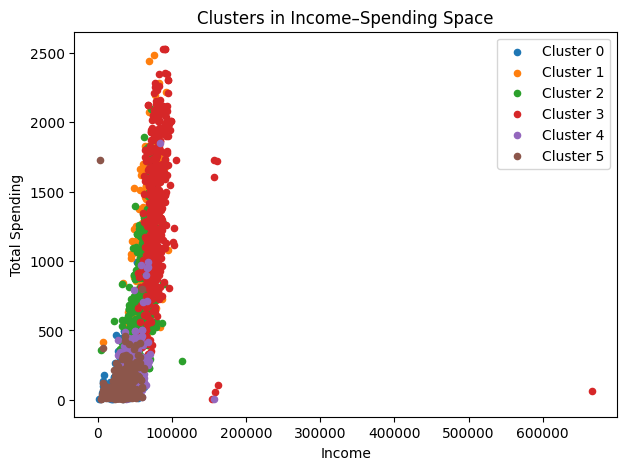

In [110]:
plt.figure(figsize=(7,5))
for k in sorted(df['Clustered'].unique()):
    subset = df[df['Clustered'] == k]
    plt.scatter(subset['Income'], subset['Total_Spending'], label=f"Cluster {k}", s=20)

plt.xlabel("Income")
plt.ylabel("Total Spending")
plt.title("Clusters in Income–Spending Space")
plt.legend()
plt.show()


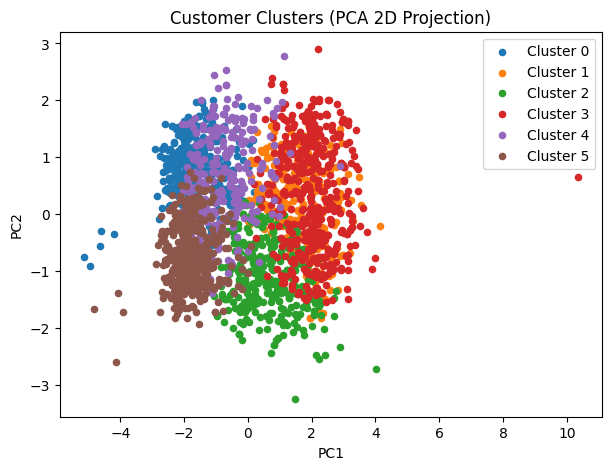

In [111]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np

features = ['Age','Income','Total_Spending',
            'NumStorePurchases','NumWebPurchases',
            'NumWebVisitsMonth','Recency']

X = df[features].values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(7,5))
for k in sorted(df['Clustered'].unique()):
    mask = df['Clustered'] == k
    plt.scatter(X_pca[mask,0], X_pca[mask,1], label=f"Cluster {k}", s=20)

plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Customer Clusters (PCA 2D Projection)")
plt.legend()
plt.show()


In [112]:
import joblib
joblib.dump(kmeans, r"C:\Projects\clustering\Customer-Segmentation\Models\kmeans_model.pkl")
joblib.dump(scaler, r"C:\Projects\clustering\Customer-Segmentation\Models\scaler.pkl")


['C:\\Projects\\clustering\\Customer-Segmentation\\Models\\scaler.pkl']